# Notebook Goal
- synthesize type differentiation methods into one place
- finalize separation (e.g., of type 4 sources)
- single-run/metric/plot methodology to split all types
- 'basis vectors'
- update table accordingly
- verify that using these methods, transition sources identified as such

# Plan ("order of operations")
- revisit stdev ratio --> separation of 

In [49]:
from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sb
import scipy.stats as st
import wotan

import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'

cross = Table.read('sourcefiles.csv')
full = Table.read('smc_x_m03_zar_match_OGLE_v2.ascii',format='ascii')

summ = pd.read_csv('summtab.csv')
alls = pd.read_csv('allsummtab.csv') #most updated table

cross['Part'] = 1
cross2 = Table.read('part2files.csv')
cross2 = join(cross2,full,keys='src_n')
cross2['Part'] = 2

In [2]:
mlist2 = ['OII I','OIII I','OIV I']
mlist1 = ['OII I','OIII I']

In [3]:
type1 = o.gettype(alls,num='1')
type2 = o.gettype(alls,num='2')
type3 = o.gettype(alls,num='3')
type4 = o.gettype(alls,num='4')
type5 = o.gettype(alls,num='5')
type6 = o.gettype(alls,num='6')
type7 = o.gettype(alls,num='7')

In [64]:
[False]*7

[False, False, False, False, False, False, False]

In [65]:
def fulltplot(x='stdev I',y='det stdev I',legend=True,tbool=[False]*7):
    o.tplot(type1,alls,color=pink,marker='*',label='1',x=x,y=y,text=tbool[0])
    o.tplot(type2,alls,color='black',label='2',x=x,y=y,text=tbool[1])
    o.tplot(type3,alls,color='darkgreen',marker='x',label='3',x=x,y=y,text=tbool[2])
    o.tplot(type4,alls,color='navy',marker='+',label='4',x=x,y=y,text=tbool[3])
    o.tplot(type5,alls,marker='v',label='5',color='maroon',x=x,y=y,text=tbool[4])
    o.tplot(type6,alls,marker='3',label='6',color='grey',x=x,y=y,text=tbool[5])
    o.tplot(type7,alls,color='darkseagreen',marker='h',label='7',x=x,y=y,text=tbool[6])
    #plt.xlim(0,0.26)#outlier
    plt.ylabel(y,fontsize=14)
    plt.xlabel(x,fontsize=14)
    if legend: plt.legend()

## Checking and Updated Stdev Ratio
- low ratio likely due to use of trend for overall rather than original points
    - test this, and which better separates types

In [41]:
def comparevar(s,window=200,plot=True,retfrac=False,retIQR=False,original=False):
    row = alls[alls['src_n']==s]
    if float(row['calibration flag'])==1: calib=True
    else: calib=False
    try: iband, vband = o.getIV(s,cross,stack=True,plot=plot,mlist=mlist1,calib=calib)
    except: iband, vband = o.getIV(s,cross2,stack=True,plot=plot,mlist=mlist2,calib=calib)
    #spline detrend
    flatten,trend = o.splinedetrend(iband,window=window,retspline=True)
    mean = np.mean(iband['I mag'])
    detimag = iband['I mag'] - trend + mean
    detimag[np.abs(detimag-mean)>1] = mean
    if original: #overall stdev is of original points
        sp_std = np.nanstd(iband['I mag'])
    else: 
        #overall stdev is stdev of fitted spline
        sp_std = np.nanstd(trend)
    det_iqr = st.iqr(detimag,nan_policy='omit')
    det_std = np.nanstd(detimag)    

    if retfrac: return det_std/sp_std
    elif retIQR: return det_std,det_iqr
    else: return det_std

In [18]:
srcns = np.array(alls['src_n'])

In [42]:
#already written out: fixing of detrended stdev 

# dets = []
# iqrs = []
# for s in srcns:
#     try: m,iq = comparevar(s,plot=False,retIQR=True)
#     except: m,iq = np.nan,np.nan
#     dets.append(m)
#     iqrs.append(iq)

empty file for OIII I
empty file for OII I
empty file for OIII I


In [51]:
alls['stdev ratio'] = alls['det stdev I']/alls['stdev I']

In [53]:
alls['IQR ratio'] = alls['det IQR']/alls['I IQR']

see resulting updated plot at end of notebook
- allsummtab updated, but allsumm (.numbers) and summtab not updated accordingly

# Working on Separation of Type 4
- problem: outbursts not always captured by detrending, so variable stdev ratio
- base num not as low as expected
- another variable that isolates them as having most points look like type 6, and then ~periodic outbursts

In [56]:
def plot(s):
    try: iband, vband = o.getIV(s,cross,stack=True,plot=True,mlist=mlist1,figsize=(4,3))
    except: iband, vband = o.getIV(s,cross2,stack=True,plot=True,mlist=mlist2,figsize=(4,3))

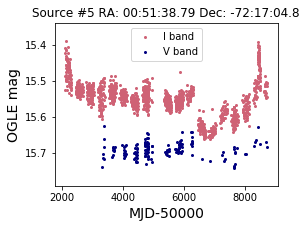

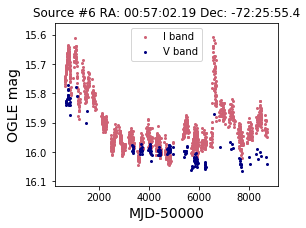

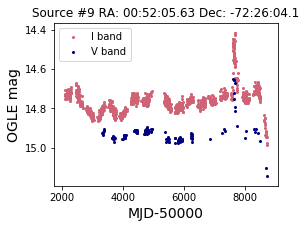

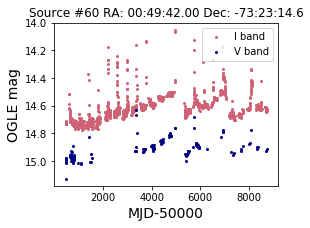

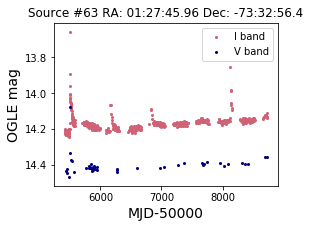

In [57]:
for t in type4:
    plot(t)

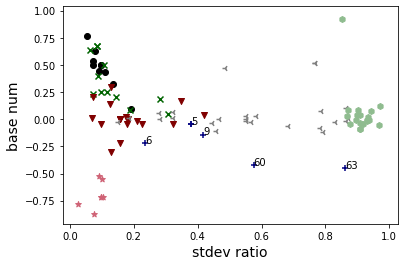

In [75]:
#understand where each is in plot
fulltplot(x='stdev ratio',y='base num',legend=False,tbool=[False,False,False,True,False,False,False])

luckily 60 and 63 are separate from others in parameter space
- true that 60 and 63 have lower variability and fainter bases
- seem to be (thinner) type 1 outbursts

empty file for OIII I


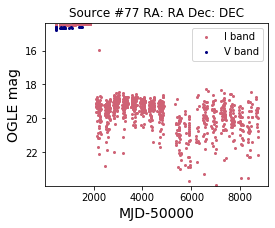

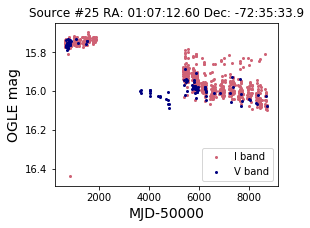

In [72]:
#weird type 6 outliers (in y-axis)
plot(77)
plot(25)

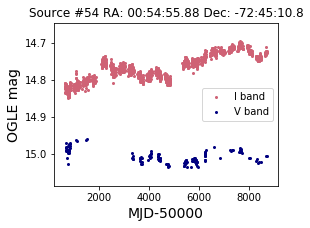

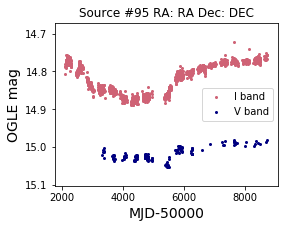

In [74]:
plot(54) #should probably be type 5
plot(95) #should probably be type 5

empty file for OII I


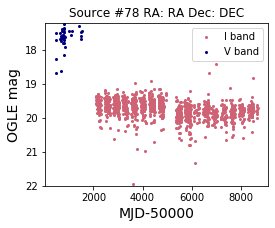

In [69]:
plot(78) #notice 78 is weird out of place outlier in plot above

# Separation of Types 2 and 3, Assuming They're Separated from the Rest
- i.e. only run this code after a cut of basenum/use conditions within bigdip
- this code successfully calls types 1 and 4 "neither type 2 or 3"

Type 3
Type 3
Type 3
Type 3
Type 3
Type 3
Type 3
Type 3
Type 3
Type 3
Type 3


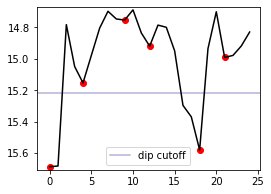

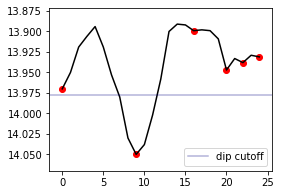

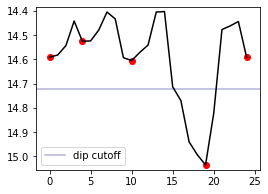

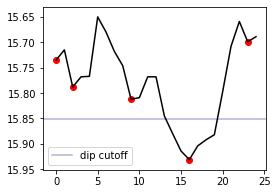

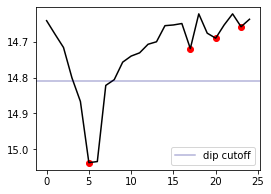

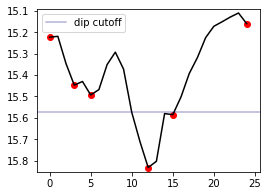

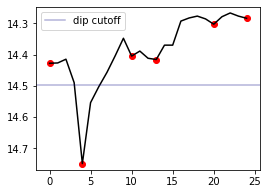

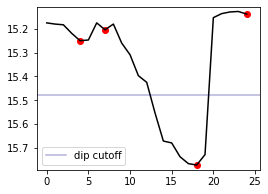

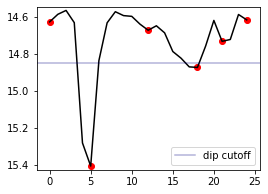

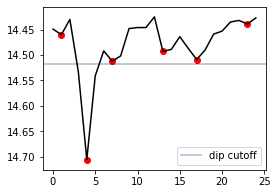

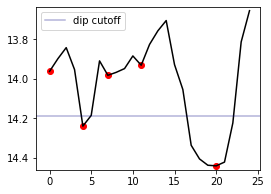

In [5]:
for t in type3:
    o.bigdip(t,cross,cross2,mlist1,mlist2,ncut=25,statistic='max',peaks=True,sig=1)

Type 2
Type 2
Type 2
Type 2
Type 2
Type 2
Type 2
Type 2
Type 2


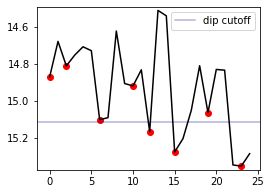

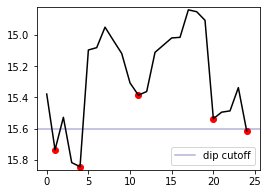

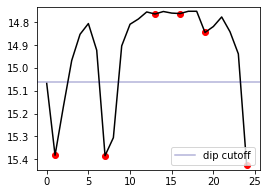

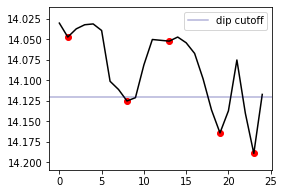

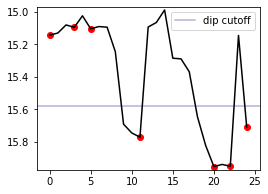

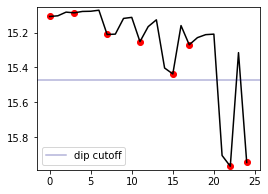

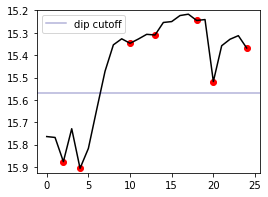

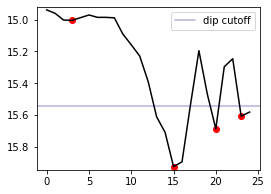

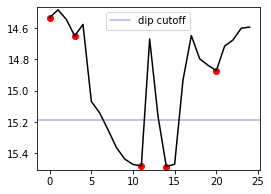

In [6]:
for t in type2:
    o.bigdip(t,cross,cross2,mlist1,mlist2,ncut=25,statistic='max',peaks=True,sig=1)

# Separation of Types 5, 6, 7
- 5s are separate from 1-4 b/c they have base num ~0
- 5, 6, 7 essentially a progression along stdev ratio
    - think of 5 as having overall variability >double the local variability
- kurtosis also helpful in division of 6 and 7

# Plotting Types

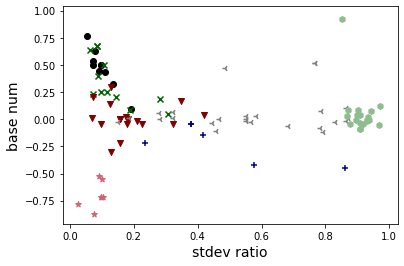

In [62]:
fulltplot(x='stdev ratio',y='base num',legend=False)